# Film Kritiklerini Sınıflandırma:İkili Sınıflandırma Örneği
## Bu örnekte, film kritiklerinin içeriklerine bakarak olumlu, olumsuz olarak sınıflandıracaksınız.

In [ ]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

### Neden eğitim ve test veri setlerini birbirinden ayırmalıyız?
Çünkü makine öğrenmesi modellerini asla eğittiniz verilerle test etmemelisiniz.

In [ ]:
train_labels[0]

1

train_data ve test_data film kritiklerini bulunduran liste değişkenleri ve her liste, kelimeleri temsil eden sayıları saklıyor. train_labels ve test_labels 0 ve 1'lerden oluşan listeleri ve 0 olumsuz kritikleri, 1 ise olumlu kritikleri temsil ediyor.

In [ ]:
test_labels[0]

0

En çok kullanılan 10000 kritiği kullanacağınız için hiçbir kelime indeksi 10000'i geçemeyecektir.

In [ ]:
max([max(sequence) for sequence in train_data])

9999

# Verileri Hazırlamak

İçerisinde sayı bulunan listeleri sinir ağlarına gönderemezsiniz.Listelerinizi tensörlere dönüştürmelisiniz.


* Listenizi bir-eleman-bir(one-hot) olarak kodlayın.Bu şu anlama geliyor:Diyelim elinizde [3,5] olan bir dizi olsun.Bu diziyi 10000 boyutlu 3'üncü ve 5'inci indeks değerleri 1 diğer hepsi 0 olacak şekilde bir vektör oluşturun.Şimdi `Dense` katmanı gibi bir katmanı kulllanabilirsiniz.  



In [ ]:
#Tam sayı dizilerini ikili matris olarak kodlamak

import numpy as np

def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension)) #(len(sequences),dimension) şeklinde tüm elemanları 0 olan matris oluşturur.
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1. #results[i]'nin istenen indekslerini 1 yapar.      
  return results

x_train=vectorize_sequences(train_data) #eğitim vektör verisi
x_test=vectorize_sequences(test_data) #test vektör verisi  


In [ ]:
x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
#Etiketlerimizi de vektör haline getirebilirsiniz:

y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

# Model Tanımı

In [ ]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

Modelin Derlenmesi

Eniyileme Algoritması:

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Doğrulama Veri Seti Oluşturmak:

Eğitim başarımını ölçmek için ağın daha önce hiç görmediği özgün veri setinden 10000 örnekten oluşan `doğrulama(validation)` seti oluşturacaksınız.

In [ ]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

# Modeli Eğitmek

Şimdi modelinizi 20 epokta, 512'lik mini-yığınlar kullanarak eğiteceksiniz.Aynı zamanda kayıp değerini ve ağ başarımını ayırdığınız doğrulama veri setinde gözlemleyeceksiniz.Bunu doğrulama veri setini `validation_data` parametresine göndererek yapacaksınız.

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5556 - acc: 0.7692 - val_loss: 0.4345 - val_acc: 0.8442
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3450 - acc: 0.9001 - val_loss: 0.3358 - val_acc: 0.8752
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2506 - acc: 0.9199 - val_loss: 0.2878 - val_acc: 0.8925
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1940 - acc: 0.9403 - val_loss: 0.2859 - val_acc: 0.8847
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1591 - acc: 0.9505 - val_loss: 0.2871 - val_acc: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1321 - acc: 0.9604 - val_loss: 0.2907 - val_acc: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1092 - acc: 0.9692 - val_loss: 0.3043 - val_acc: 0.8844
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0907 - a

## Eğitim ve Doğruluk Kayıplarını Çizdirmek

In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

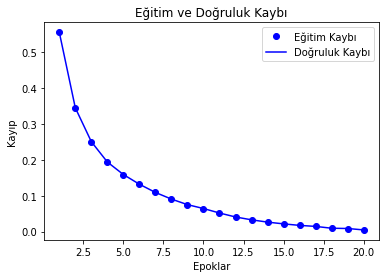

In [ ]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]

epochs=range(1,len(loss_values) + 1)

plt.plot(epochs,loss_values,"bo",label="Eğitim Kaybı") #"bo" mavi nokta için
plt.plot(epochs,loss_values,"b",label="Doğruluk Kaybı") #"b" mavi düz çizgi için
plt.title("Eğitim ve Doğruluk Kaybı")
plt.xlabel("Epoklar")
plt.ylabel("Kayıp")
plt.legend()

plt.show()

Eğitim ve Doğrulama Başarımını Çizdirmek

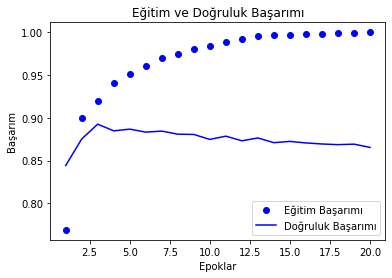

In [ ]:
plt.clf() #şekli temizler

acc=history_dict["acc"]
val_acc=history_dict["val_acc"]
plt.plot(epochs,acc,"bo",label="Eğitim Başarımı")
plt.plot(epochs,val_acc,"b",label="Doğruluk Başarımı")
plt.title("Eğitim ve Doğruluk Başarımı")
plt.xlabel("Epoklar")
plt.ylabel("Başarım")
plt.legend()

plt.show()